1. Veri Setimizi Oluşturacağız
2. Model (Class)
3. Model Eğitimi
4. Test
5. Model Çizimi

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

In [5]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=123)

In [6]:
y[0:5]

array([0, 0, 1, 1, 0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Text(0.5, 1.0, 'Generated Data')

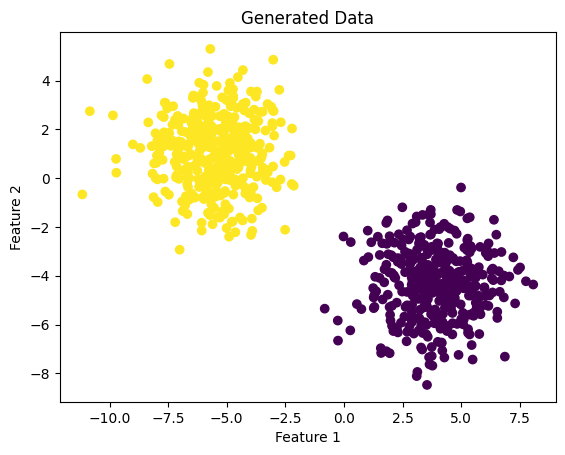

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')

Text(0.5, 1.0, 'Generated Data')

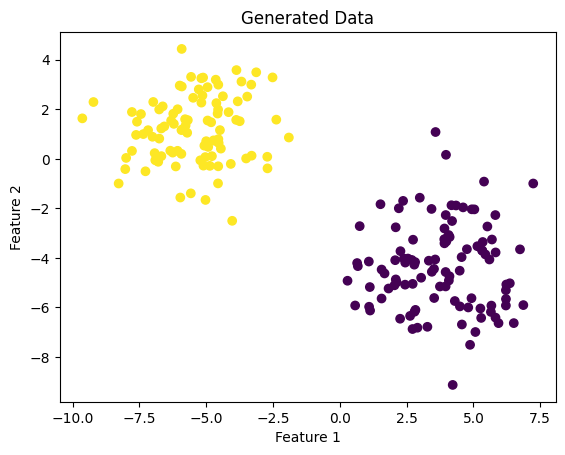

In [9]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')

Model

In [10]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_steps=100):
        self.weights = None
        self.bias = None
        self.activation_function = self._unit_activation_function
        self.learning_rate = learning_rate
        self.n_steps = n_steps

    def _unit_activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_steps):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

In [11]:
model = Perceptron(learning_rate=0.01, n_steps=1000)

In [12]:
model.fit(X_train, y_train)

In [13]:
model.weights

array([-0.023438  ,  0.02296811])

In [14]:
model.bias

np.float64(-0.01)

In [15]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [17]:
accuracy_score(y_test, model.predict(X_test))

1.0

Model Plot

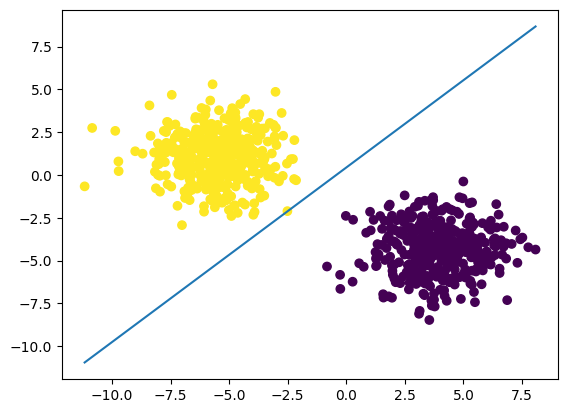

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
x1 = np.amin(X_train[:, 0])
x2 = np.amax(X_train[:, 0])
y1 = (-1 * model.weights[0] * x1 - model.bias) / model.weights[1]
y2 = (-1 * model.weights[0] * x2 - model.bias) / model.weights[1]

plt.plot([x1, x2], [y1, y2])